# APS as Features

In [ ]:
import os
import csv
import pandas as pd
import random
from scapy.all import *


# Define the feature space
features = ['Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol', 'Avg Packet Size', 'Label']

# Define the input and output directories
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/DeltaShaperTrafficCaptures/480Resolution/DeltaShaperTraffic_320'
output_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj'

# Define the output file path
output_file = os.path.join(output_dir, 'output320.csv')

# Open the output CSV file and write the header
with open(output_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(features)

    # Iterate over the subfolders within the input directory
    for subfolder in os.listdir(input_dir):

        # Construct the path to the subfolder
        subfolder_path = os.path.join(input_dir, subfolder)

        # Check if the item is a directory
        if os.path.isdir(subfolder_path):

            # Iterate over the pcap files within the subfolder
            for pcap_file in os.listdir(subfolder_path):

                # Construct the full path to the pcap file
                pcap_file_path = os.path.join(subfolder_path, pcap_file)

                # Load the pcap file using Scapy
                try:
                    pcap = rdpcap(pcap_file_path)
                except Scapy_Exception as e:
                    continue

                # Extract the flow features
                if len(pcap) > 0:
                    # Define a dictionary to store packets based on their 5-tuple information
                    flows = {}

                    # Iterate over all packets in the pcap file
                    for packet in pcap:

                        # Check if the packet contains IP and TCP/UDP layer information
                        if IP in packet and (TCP in packet or UDP in packet):

                            # Define a tuple that represents the 5-tuple information of the packet
                            if TCP in packet:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[TCP].sport, packet[TCP].dport, 'TCP')
                            else:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[UDP].sport, packet[UDP].dport, 'UDP')

                            # Check if the flow tuple exists in the dictionary
                            if flow_tuple in flows:
                                flows[flow_tuple].append(packet)
                            else:
                                flows[flow_tuple] = [packet]

                    # Calculate flow features for each flow
                    for flow_tuple, packets in flows.items():
                        flow_features = [0] *(len(features))
                        flow_features[0:5] = flow_tuple
                        flow_features[5] = sum([len(packet) for packet in packets]) / len(packets) # 'Avg Packet Size'
                        flow_features[6] = sum([packets[i].time - packets[i-1].time for i in range(1, len(packets))]) / (len(packets) - 1) if len(packets) > 1 else 0
                        flow_features[7] = 1
                        # Write the flow features to the CSV file
                        writer.writerow(flow_features)

# Close the output CSV file
f.close()


In [ ]:
import os
import csv
import pandas as pd
import random
from scapy.all import *


# Define the feature space
features = ['Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol', 'Avg Packet Size', 'Label']

# Define the input and output directories
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/DeltaShaperTrafficCaptures/480Resolution/DeltaShaperTraffic_160'
output_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj'

# Define the output file path
output_file = os.path.join(output_dir, 'output160.csv')

# Open the output CSV file and write the header
with open(output_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(features)

    # Iterate over the subfolders within the input directory
    for subfolder in os.listdir(input_dir):

        # Construct the path to the subfolder
        subfolder_path = os.path.join(input_dir, subfolder)

        # Check if the item is a directory
        if os.path.isdir(subfolder_path):

            # Iterate over the pcap files within the subfolder
            for pcap_file in os.listdir(subfolder_path):

                # Construct the full path to the pcap file
                pcap_file_path = os.path.join(subfolder_path, pcap_file)

                # Load the pcap file using Scapy
                try:
                    pcap = rdpcap(pcap_file_path)
                except Scapy_Exception as e:
                    continue

                # Extract the flow features
                if len(pcap) > 0:
                    # Define a dictionary to store packets based on their 5-tuple information
                    flows = {}

                    # Iterate over all packets in the pcap file
                    for packet in pcap:

                        # Check if the packet contains IP and TCP/UDP layer information
                        if IP in packet and (TCP in packet or UDP in packet):

                            # Define a tuple that represents the 5-tuple information of the packet
                            if TCP in packet:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[TCP].sport, packet[TCP].dport, 'TCP')
                            else:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[UDP].sport, packet[UDP].dport, 'UDP')

                            # Check if the flow tuple exists in the dictionary
                            if flow_tuple in flows:
                                flows[flow_tuple].append(packet)
                            else:
                                flows[flow_tuple] = [packet]

                    # Calculate flow features for each flow
                    for flow_tuple, packets in flows.items():
                        flow_features = [0] *(len(features))
                        flow_features[0:5] = flow_tuple
                        flow_features[5] = sum([len(packet) for packet in packets]) / len(packets) # 'Avg Packet Size'
                        flow_features[6] = sum([packets[i].time - packets[i-1].time for i in range(1, len(packets))]) / (len(packets) - 1) if len(packets) > 1 else 0
                        flow_features[7] = 1
                        # Write the flow features to the CSV file
                        writer.writerow(flow_features)

# Close the output CSV file
f.close()


In [ ]:
import os
import csv
import pandas as pd
import random
from scapy.all import *


# Define the feature space
features = ['Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol', 'Avg Packet Size', 'Label']

# Define the input and output directories
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/DeltaShaperTrafficCaptures/480Resolution/RegularTraffic'
output_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj'

# Define the output file path
output_file = os.path.join(output_dir, 'benign.csv')

# Open the output CSV file and write the header
with open(output_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(features)

    # Iterate over the subfolders within the input directory
    for subfolder in os.listdir(input_dir):

        # Construct the path to the subfolder
        subfolder_path = os.path.join(input_dir, subfolder)

        # Check if the item is a directory
        if os.path.isdir(subfolder_path):

            # Iterate over the pcap files within the subfolder
            for pcap_file in os.listdir(subfolder_path):

                # Construct the full path to the pcap file
                pcap_file_path = os.path.join(subfolder_path, pcap_file)

                # Load the pcap file using Scapy
                try:
                    pcap = rdpcap(pcap_file_path)
                except Scapy_Exception as e:
                    continue

                # Extract the flow features
                if len(pcap) > 0:
                    # Define a dictionary to store packets based on their 5-tuple information
                    flows = {}

                    # Iterate over all packets in the pcap file
                    for packet in pcap:

                        # Check if the packet contains IP and TCP/UDP layer information
                        if IP in packet and (TCP in packet or UDP in packet):

                            # Define a tuple that represents the 5-tuple information of the packet
                            if TCP in packet:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[TCP].sport, packet[TCP].dport, 'TCP')
                            else:
                                flow_tuple = (packet[IP].src, packet[IP].dst, packet[UDP].sport, packet[UDP].dport, 'UDP')

                            # Check if the flow tuple exists in the dictionary
                            if flow_tuple in flows:
                                flows[flow_tuple].append(packet)
                            else:
                                flows[flow_tuple] = [packet]

                    # Calculate flow features for each flow
                    for flow_tuple, packets in flows.items():
                        flow_features = [0] *(len(features))
                        flow_features[0:5] = flow_tuple
                        flow_features[5] = sum([len(packet) for packet in packets]) / len(packets) # 'Avg Packet Size'
                        flow_features[6] = sum([packets[i].time - packets[i-1].time for i in range(1, len(packets))]) / (len(packets) - 1) if len(packets) > 1 else 0
                        flow_features[7] = 0
                        # Write the flow features to the CSV file
                        writer.writerow(flow_features)

# Close the output CSV file
f.close()


Merging and Shuffling

In [ ]:
import pandas as pd
import random

# read the three CSV files into pandas dataframes
df1 = pd.read_csv('output160.csv')
df2 = pd.read_csv('output320.csv')
df3 = pd.read_csv('benign.csv')

# merge the dataframes into one
merged_df = pd.concat([df1, df2, df3])

# shuffle the rows of the merged dataframe
shuffled_df = merged_df.sample(frac=1, random_state=random.seed())

# write the shuffled dataframe to a new CSV file
shuffled_df.to_csv('shuffled.csv', index=False)


In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, _tree


# Load data from CSV file
data = pd.read_csv('FinalInput.csv')
X = data['Avg Packet Size'].values.reshape(-1, 1)  # Feature: Avg Packet Size 


y = data['Label'].values  # Labels: 0 or 1



# Split data into training and testing sets (80/20 split)
split_idx = int(0.8 * len(data))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Train decision tree on training set
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict labels for testing set
y_pred = tree.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")



print("-----------------------------------------------------")
# Compute evaluation metrics
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_test)):
    if y_test[i] == 1 and y_pred[i] == 1:
        tp += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        fn += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        fp += 1
    else:
        tn += 1

accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2*precision*recall/(precision+recall)

print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"fn: {fn}")
print(f"tn: {tn}")

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

pickle.dump(tree, open('DT.pkl', 'wb'))


Accuracy: 0.6900384779820437
Recall: 0.977449260836883
Precision: 0.6936960967369076
F1 Score: 0.8114826564043891
-----------------------------------------------------
tp: 7802
fp: 3445
fn: 180
tn: 268
Accuracy: 0.6900384779820437
Recall: 0.977449260836883
Precision: 0.6936960967369076
F1 Score: 0.8114826564043891


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle

# Get rules from decision tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (prob: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

rules = get_rules(tree, ['Avg Packet Size'], [0,1])
for r in rules:
    print(r)
    print('\n')
    



Find rules only for malicious flow

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle

# Get rules from decision tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules_0 = []
    rules_1 = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        
        classes = path[-1][0][0]
        l = np.argmax(classes)
        if l == 0:
            if class_names is None:
                rule += "response: "+str(np.round(path[-1][0][0][0],3))
            else:
                rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
            rule += f" | based on {path[-1][1]:,} samples"
            rules_0 += [rule]
        else:
            if class_names is None:
                rule += "response: "+str(np.round(path[-1][0][0][0],3))
            else:
                rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
            rule += f" | based on {path[-1][1]:,} samples"
            rules_1 += [rule]
        
    return rules_0, rules_1

# Call the function to get rules

rules_0, rules_1 = get_rules(tree, ['Avg Packet Size'], [0,1]) 


 
print("Rules for label 1:")
for r in rules_1:
    print(r)
    print('\n')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pickle


# Load data from CSV file
data = pd.read_csv('FinalInput.csv')
X = data[['Avg Packet Size']].values  # Features: Avg Packet Size, IPD
y = data['Label'].values  # Labels: 0 or 1

# Split data into training and testing sets (80/20 split)
split_idx = int(0.8 * len(data))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Train random forest on training set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict labels for testing set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest F1 Score: {f1}")

pickle.dump(tree, open('RF.pkl', 'wb'))
 


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load data from CSV file
data = pd.read_csv('FinalInput.csv')
X = data[['Avg Packet Size']].values  # Features: Avg Packet Size  
y = data['Label'].values # Labels: 0 or 1

# Split data into training and testing sets (80/20 split)
split_idx = int(0.8 * len(data))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Train XGBoost model on training set
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Predict labels for testing set
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

print("-----------------------------------------------------")
# Compute evaluation metrics
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_test)):
    if y_test[i] == 1 and y_pred[i] == 1:
        tp += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        fn += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        fp += 1
    else:
        tn += 1

accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2*precision*recall/(precision+recall)

print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"fn: {fn}")
print(f"tn: {tn}")

# Print evaluation metrics
print(f"Xgb Accuracy: {accuracy}")
print(f"Xgb Recall: {recall}")
print(f"Xgb Precision: {precision}")
print(f"Xgb F1 Score: {f1}")


# Simulation

In [1]:
from scapy.all import *
import ipaddress
from fastcrc import crc16, crc32, crc64
import pickle
import pandas as pd
import numpy as np


rf = pickle.load(open("RF.pkl", 'rb'))
dt = pickle.load(open("DT.pkl",'rb'))

size = 8192
active_timeout = 0.5
idle_timeout = 0.0000001





In [2]:
# Start Time
start_ts = {} 
for i in range(size):
    start_ts[i] = 0
    
# End Time
end_ts = {}
for i in range(size):
    end_ts[i] = 0

#Hash Tables for 5 tuple 
tuple_reg = {} 
for i in range(size):
    tuple_reg[i] = [0,0,0,0,0]

#Packet Count    
pkt_cnt = {} 
for i in range(size):
    pkt_cnt[i] = 0

pkt_size = {} 
for i in range(size):
    pkt_size[i] = 0

flow_id = {}
#Initialize
for i in range(size):
    flow_id[i] = 0
    
flow_type = {}
#Initialize
for i in range(size):
    flow_type[i] = 0
    
    
FIN = 0x01
RST = 0x04
SYN = 0x02
PSH = 0x08
ACK = 0x10
 
case3 = 0
case4 = 0
case2 = 0


## Case1 Untracked Flows 

In [152]:
               
pcap_trace = "/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/DeltaShaperTrafficCaptures/480Resolution/RegularTraffic/sample0/sample0.pcap"
 
pcap_flow = PcapReader(pcap_trace)

for pkt in pcap_flow:
    src_ip = 0
    dst_ip = 0
    sport = 0
    dport = 0
    prot = 0
    reset = False
    if IP in pkt:
        src_ip = int(ipaddress.ip_address(pkt[IP].src))
        dst_ip = int(ipaddress.ip_address(pkt[IP].dst))
    if TCP in pkt:
        sport=pkt[TCP].sport
        dport=pkt[TCP].dport
        if IP in pkt:
            prot = 6
    elif UDP in pkt:
        sport=pkt[UDP].sport
        dport=pkt[UDP].dport
        if IP in pkt:
            prot = 17
 
    ip1 = min(src_ip, dst_ip)
    ip2 = max(src_ip, dst_ip)
 
    port1 = min(sport, dport)
    port2 = max(sport, dport)
    
    srcAddr = dst_ip
    dstAddr = src_ip
    srcPort = dport
    dstPort = sport
 
    idx = 0 
    
    
    if(IP in pkt):
        idx = crc16.xmodem(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size 
        # Case1 
        if(start_ts[idx] == 0 and end_ts[idx] == 0 and tuple_reg[idx] == [0,0,0,0,0] and pkt_cnt[idx] == 0 and flow_id[idx] == 0):
            start_ts[idx] = pkt.time
            end_ts[idx] = pkt.time
            tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
            pkt_cnt[idx] = 1
            pkt_size[idx] = len(pkt)
            flow_id[idx] = idx
        #Case2
        elif flow_id[idx]!= 0 :
            if flow_id[idx] == idx : #No collision
                end_ts[idx] = pkt.time
                tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                pkt_cnt[idx] += 1
                pkt_size[idx] += len(pkt)
                if dt.predict(np.array([[pkt_size[idx]/pkt_cnt[idx]]])) == 1:
                    flow_type[idx] = 1
                    #Eviction Checking
                if (((pkt.time - end_ts[idx]) > idle_timeout) or ((end_ts[idx] - start_ts[idx]) > active_timeout) or  (TCP in pkt and (pkt['TCP'].flags & FIN or pkt['TCP'].flags & RST))) :
                    with open("flows1.txt", "a") as f:
                        line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                        case2 +=1
                        f.write(line)
                    start_ts[idx] = 0 
                    end_ts[idx] = 0  
                    tuple_reg[idx] == [0,0,0,0,0]  
                    pkt_cnt[idx] = 0 
                    flow_id[idx] = 0
                    flow_type[idx] = 0
                                
            if flow_id[idx] != idx : #Collision
                if flow_type[idx] == 0 :
                    with open("flows1.txt", "a") as f: #Eviction
                        line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                        case3 +=1
                        f.write(line)
                    start_ts[idx] = pkt.time
                    end_ts[idx] = pkt.time
                    tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                    pkt_cnt[idx] = 1
                    pkt_size[idx] = len(pkt)
                    flow_id[idx] = idx
                    flow_type[idx]  = 0 ##??
                elif flow_type[idx] == 1:
                    case4 +=1
                    continue       
                      

    
  

In [153]:
for i in range(size):
    with open("flows1.txt", "a") as f: #Eviction
        line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
        f.write(line)

In [351]:
from scapy.all import *
import ipaddress
from fastcrc import crc16, crc32, crc64
import pickle
import pandas as pd
import numpy as np


rf = pickle.load(open("RF.pkl", 'rb'))
dt = pickle.load(open("DT.pkl",'rb'))

size = 120 
active_timeout = 220
idle_timeout = 0.0000000003

# Start Time
start_ts = {} 
for i in range(size):
    start_ts[i] = 0
    
# End Time
end_ts = {}
for i in range(size):
    end_ts[i] = 0

#Hash Tables for 5 tuple 
tuple_reg = {} 
for i in range(size):
    tuple_reg[i] = [0,0,0,0,0]

#Packet Count    
pkt_cnt = {} 
for i in range(size):
    pkt_cnt[i] = 0

pkt_size = {} 
for i in range(size):
    pkt_size[i] = 0

flow_id = {}
#Initialize
for i in range(size):
    flow_id[i] = 0
    
flow_type = {}
#Initialize
for i in range(size):
    flow_type[i] = 0
    
    
FIN = 0x01
RST = 0x04
SYN = 0x02
PSH = 0x08
ACK = 0x10
 
case3 = 0
case4 = 0
case2 = 0


In [352]:
# Define the input and output directories
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Sample' 
output_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Fin'
# Iterate over the subfolders within the input directory
for subfolder in os.listdir(input_dir):

    # Construct the path to the subfolder
    subfolder_path = os.path.join(input_dir, subfolder)

    # Check if the item is a directory
    if os.path.isdir(subfolder_path):

        # Iterate over the pcap files within the subfolder
        for pcap_file in os.listdir(subfolder_path):

            # Construct the full path to the pcap file
            pcap_file_path = os.path.join(subfolder_path, pcap_file)

            # Load the pcap file using Scapy
            try:
                pcap_flow = PcapReader(pcap_file_path)
            except Scapy_Exception as e:
                continue
                
            # Create the output file name by replacing the pcap extension with txt
            output_file_name = os.path.splitext(pcap_file)[0] + ".txt"
            output_file_path = os.path.join(output_dir, output_file_name)
            
            for pkt in pcap_flow:
                src_ip = 0
                dst_ip = 0
                sport = 0
                dport = 0
                prot = 0
                reset = False
                if IP in pkt:
                    src_ip = int(ipaddress.ip_address(pkt[IP].src))
                    dst_ip = int(ipaddress.ip_address(pkt[IP].dst))
                if TCP in pkt:
                    sport=pkt[TCP].sport
                    dport=pkt[TCP].dport
                    if IP in pkt:
                        prot = 6
                elif UDP in pkt:
                    sport=pkt[UDP].sport
                    dport=pkt[UDP].dport
                    if IP in pkt:
                        prot = 17

                ip1 = min(src_ip, dst_ip)
                ip2 = max(src_ip, dst_ip)

                port1 = min(sport, dport)
                port2 = max(sport, dport)

                srcAddr = dst_ip
                dstAddr = src_ip
                srcPort = dport
                dstPort = sport

                idx = 0 


                if(IP in pkt):
                    #idx = crc16.xmodem(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size 
                    idx = crc16.xmodem(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size 
                    #idx = crc32.aixm(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size
                    # Case1 
                    if(start_ts[idx] == 0 and end_ts[idx] == 0 and tuple_reg[idx] == [0,0,0,0,0] and pkt_cnt[idx] == 0 and flow_id[idx] == 0):
                        start_ts[idx] = pkt.time
                        end_ts[idx] = pkt.time
                        tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                        pkt_cnt[idx] = 1
                        pkt_size[idx] = len(pkt)
                        flow_id[idx] = idx
                    #Case2
                    elif flow_id[idx]!= 0 :
                        if flow_id[idx] == idx : #No collision
                            end_ts[idx] = pkt.time
                            tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                            pkt_cnt[idx] += 1
                            pkt_size[idx] += len(pkt)
                            if dt.predict(np.array([[pkt_size[idx]/pkt_cnt[idx]]])) == 1:
                                flow_type[idx] = 1
                                #Eviction Checking
                            if (((pkt.time - end_ts[idx]) > idle_timeout) or ((end_ts[idx] - start_ts[idx]) > active_timeout) or  (TCP in pkt and (pkt['TCP'].flags & FIN or pkt['TCP'].flags & RST))) :
                                with open(output_file_path, "a") as f:
                                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                                    case2 +=1
                                    f.write(line)
                                start_ts[idx] = 0 
                                end_ts[idx] = 0  
                                tuple_reg[idx] == [0,0,0,0,0]  
                                pkt_cnt[idx] = 0 
                                flow_id[idx] = 0
                                flow_type[idx] = 0

                        if flow_id[idx] != idx : #Collision
                            if flow_type[idx] == 0 :
                                with open(output_file_path, "a") as f: #Eviction
                                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                                    case3 +=1
                                    f.write(line)
                                start_ts[idx] = pkt.time
                                end_ts[idx] = pkt.time
                                tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                                pkt_cnt[idx] = 1
                                pkt_size[idx] = len(pkt)
                                flow_id[idx] = idx
                                flow_type[idx]  = 0 ##??
                            elif flow_type[idx] == 1:
                                case4 +=1
                                continue 
            for i in range(size):
                with open(output_file_path, "a") as f: #Eviction
                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                    f.write(line)                


In [341]:
import os

tp = 0
fn = 0

# Define the input directory
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Fin'

# Iterate over the files in the directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('30_1_6.txt'):
        tp = 0
        fn = 0
        # Open the file and read its contents
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
            # Iterate over the rows in the file
            for line in lines:
                # Split the row into a list of elements
                row = line.strip().split(',')
                # Check if the last element is '1' or '0'
                if row[-1] == '1':
                    tp += 1
                elif row[-1] == '0':
                    fn += 1
        # Print the results
        recall = tp/(tp+fn)
        print(recall, " ", filename )


0.7884615384615384   sample14_160x120_40x30_1_6.txt
0.6511627906976745   sample147_160x120_40x30_1_6.txt
0.6704545454545454   sample129_160x120_40x30_1_6.txt
0.8260869565217391   sample215_160x120_40x30_1_6.txt
0.7419354838709677   sample189_160x120_40x30_1_6.txt
0.8571428571428571   sample203_160x120_40x30_1_6.txt
0.8409090909090909   sample151_160x120_40x30_1_6.txt
0.6973684210526315   sample98_160x120_40x30_1_6.txt
0.7884615384615384   sample40_160x120_40x30_1_6.txt
0.6511627906976745   sample299_160x120_40x30_1_6.txt
0.7058823529411765   sample113_160x120_40x30_1_6.txt
0.6666666666666666   sample241_160x120_40x30_1_6.txt
0.8260869565217391   sample257_160x120_40x30_1_6.txt
0.8571428571428571   sample239_160x120_40x30_1_6.txt
0.78   sample105_160x120_40x30_1_6.txt
0.8571428571428571   sample8_160x120_40x30_1_6.txt
0.7166666666666667   sample56_160x120_40x30_1_6.txt
0.868421052631579   sample38_160x120_40x30_1_6.txt
0.8409090909090909   sample64_160x120_40x30_1_6.txt
0.80434782608695

In [33]:
import os

tp = 0
fn = 0

# Define the input directory
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Fin'

# Iterate over the files in the directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('30_1_6.txt'):
        # Open the file and read its contents
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
            # Iterate over the rows in the file
            for line in lines:
                # Split the row into a list of elements
                row = line.strip().split(',')
                # Check if the last element is '1' or '0'
                if row[-1] == '1':
                    tp += 1
                elif row[-1] == '0':
                    fn += 1

# Print the results
recall = tp/(tp+fn)
print(recall)


0.5911413969335605


In [5]:
import os

fp = 0
tn = 0

# Define the input directory
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Benign_128k'

# Iterate over the files in the directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Open the file and read its contents
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
            # Iterate over the rows in the file
            for line in lines:
                # Split the row into a list of elements
                row = line.strip().split(',')
                # Check if the last element is '1' or '0'
                if row[-1] == '1':
                    fp += 1
                elif row[-1] == '0':
                    tn += 1




In [103]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2*precision*recall/(precision+recall)


print(accuracy)
print(precision)

0.49667053298223257
0.49832051354285856


In [15]:
tp = 0
fn = 0

# Define the input directory
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Malicious'

# Iterate over the files in the directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Open the file and read its contents
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
            # Iterate over the rows in the file
            for line in lines:
                # Split the row into a list of elements
                row = line.strip().split(',')
                # Check if the last element is '1' or '0'
                if row[-1] == '1':
                    tp += 1
                elif row[-1] == '0':
                    fn += 1

# Print the results
recall = tp/(tp+fn)
print(recall)


0.628424543946932


In [6]:
hash_entries = [2**i for i in range(14, 4, -1)]
print(hash_entries)

[16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32]


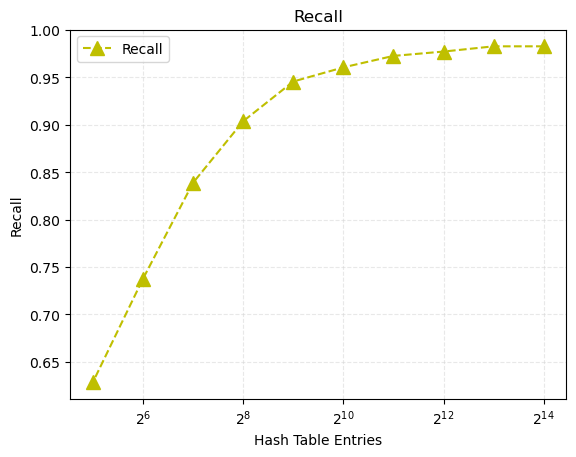

In [110]:
import matplotlib.pyplot as plt

# Define the recall values for different hash table sizes
hash_entries = [2**i for i in range(14, 4, -1)]
recall_values = [0.9827623233523652, 0.9827576113351233, 0.9772380857215817, 0.9726598239461909, 
                 0.960562238716833, 0.9456370827548389, 0.9037296984999893, 0.8388243011771566, 
                 0.7374693877551021, 0.628424543946932]

# Plot the graph
plt.plot(hash_entries[-10:], recall_values, 'y^--', markersize=10,label='Recall')  # Only plot the last 10 hash table sizes
plt.xscale('log', base=2)  # Set log scale for x-axis
plt.grid(True, linestyle='--', color='lightgray', alpha=0.5)

plt.xlabel('Hash Table Entries')
plt.ylabel('Recall') 
plt.legend()
plt.title('Recall')
plt.show()


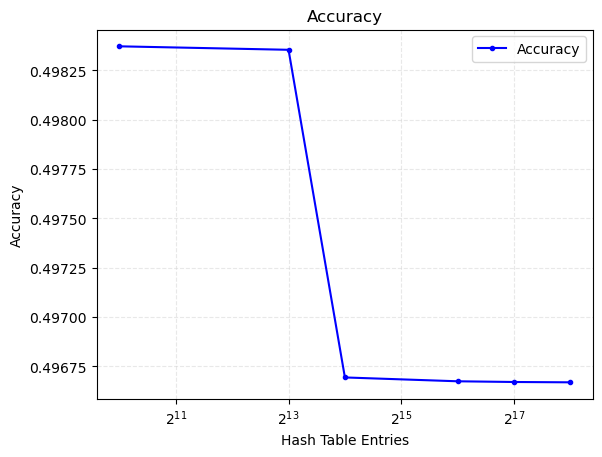

In [98]:
import matplotlib.pyplot as plt

# Define the recall values for different hash table sizes
hash_entries = [262144, 131072, 65536, 16384, 8192, 1024]
recall_values = [0.4966686153687781 ,0.4966702794582301,0.49667388467419715,0.4966933467682521,0.4983539586392511,0.49837156311711983]

# Plot the graph
plt.plot(hash_entries[-10:], recall_values, 'bo-', markersize=3,label='Accuracy')  # Only plot the last 10 hash table sizes

plt.xscale('log', base=2)  # Set log scale for x-axis
plt.grid(True, linestyle='--', color='lightgray', alpha=0.5)

plt.xlabel('Hash Table Entries')
plt.ylabel('Accuracy') 
plt.legend()
plt.title('Accuracy')
plt.show()

In [91]:
[2**i for i in range(18, 10, -1)]

[262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048]

In [55]:
np.arange(0, .00001, 0.0000001)

array([0.0e+00, 1.0e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07, 6.0e-07,
       7.0e-07, 8.0e-07, 9.0e-07, 1.0e-06, 1.1e-06, 1.2e-06, 1.3e-06,
       1.4e-06, 1.5e-06, 1.6e-06, 1.7e-06, 1.8e-06, 1.9e-06, 2.0e-06,
       2.1e-06, 2.2e-06, 2.3e-06, 2.4e-06, 2.5e-06, 2.6e-06, 2.7e-06,
       2.8e-06, 2.9e-06, 3.0e-06, 3.1e-06, 3.2e-06, 3.3e-06, 3.4e-06,
       3.5e-06, 3.6e-06, 3.7e-06, 3.8e-06, 3.9e-06, 4.0e-06, 4.1e-06,
       4.2e-06, 4.3e-06, 4.4e-06, 4.5e-06, 4.6e-06, 4.7e-06, 4.8e-06,
       4.9e-06, 5.0e-06, 5.1e-06, 5.2e-06, 5.3e-06, 5.4e-06, 5.5e-06,
       5.6e-06, 5.7e-06, 5.8e-06, 5.9e-06, 6.0e-06, 6.1e-06, 6.2e-06,
       6.3e-06, 6.4e-06, 6.5e-06, 6.6e-06, 6.7e-06, 6.8e-06, 6.9e-06,
       7.0e-06, 7.1e-06, 7.2e-06, 7.3e-06, 7.4e-06, 7.5e-06, 7.6e-06,
       7.7e-06, 7.8e-06, 7.9e-06, 8.0e-06, 8.1e-06, 8.2e-06, 8.3e-06,
       8.4e-06, 8.5e-06, 8.6e-06, 8.7e-06, 8.8e-06, 8.9e-06, 9.0e-06,
       9.1e-06, 9.2e-06, 9.3e-06, 9.4e-06, 9.5e-06, 9.6e-06, 9.7e-06,
       9.8e-06, 9.9e

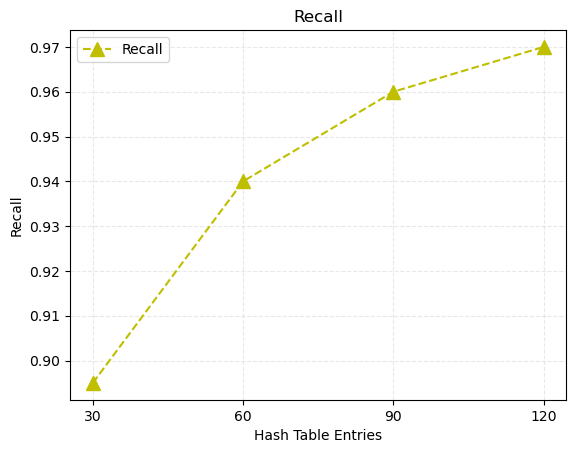

In [354]:
import matplotlib.pyplot as plt

# Define the recall values for different hash table sizes
hash_entries = [30, 60, 90, 120]
recall_values = [0.895, 0.94,0.96, 0.97]




# Plot the graph
plt.plot(hash_entries, recall_values, 'y^--', markersize=10,label='Recall')  # Only plot the last 10 hash table sizes
#plt.xscale('log', base=2)  # Set log scale for x-axis
plt.xticks([30, 60, 90, 120])
plt.grid(True, linestyle='--', color='lightgray', alpha=0.5)

plt.xlabel('Hash Table Entries')
plt.ylabel('Recall') 
plt.legend()
plt.title('Recall')
plt.show()

In [ ]:
def extract_features(pkt, pkt_cnt, pkt_size, start_ts, end_ts, flow_flags):
    flow_duration = end_ts - start_ts
    flow_iat_min = end_ts - start_ts  # You need to calculate the inter-arrival time between packets and store the minimum value.
    flow_subflow_f_bytes = pkt_size
    flow_total_len_f_packets = pkt_size
    flow_active_min = 0  # You need to calculate active times and store the minimum value.
    flow_avg_packet_size = pkt_size / pkt_cnt if pkt_cnt != 0 else 0
    flow_active_mean = 0  # You need to calculate the active times and store the mean value.
    flow_init_win_f_bytes = 0  # You need to extract the initial window size for the flow from TCP headers.

    flow_psh_flag_count = flow_flags['psh']
    flow_syn_flag_count = flow_flags['syn']
    flow_ack_flag_count = flow_flags['ack']

    features = [
        flow_iat_min, flow_subflow_f_bytes, flow_duration,
        flow_total_len_f_packets, flow_active_min, flow_avg_packet_size,
        flow_active_mean, flow_init_win_f_bytes, flow_psh_flag_count,
        flow_syn_flag_count, flow_ack_flag_count
    ]

    return features


In [ ]:
from scapy.all import *
import ipaddress
from fastcrc import crc16, crc32, crc64
import pickle
import pandas as pd
import numpy as np
import os

rf = pickle.load(open("RF.pkl", 'rb'))
dt = pickle.load(open("DT.pkl",'rb'))

size = 120 
active_timeout = 220
idle_timeout = 0.0000000003

# Start Time
start_ts = {} 
for i in range(size):
    start_ts[i] = 0
    
# End Time
end_ts = {}
for i in range(size):
    end_ts[i] = 0

#Hash Tables for 5 tuple 
tuple_reg = {} 
for i in range(size):
    tuple_reg[i] = [0,0,0,0,0]

#Packet Count    
pkt_cnt = {} 
for i in range(size):
    pkt_cnt[i] = 0

pkt_size = {} 
for i in range(size):
    pkt_size[i] = 0

flow_id = {}
#Initialize
for i in range(size):
    flow_id[i] = 0
    
flow_type = {}
#Initialize
for i in range(size):
    flow_type[i] = 0
    
FIN = 0x01
RST = 0x04
SYN = 0x02
PSH = 0x08
ACK = 0x10

# Initialize dictionaries for features
flow_iat_min = {}
flow_subflow_f_bytes = {}
flow_duration = {}
flow_total_len_f_packets = {}
flow_active_min = {}
flow_avg_packet_size = {}
flow_active_mean = {}
flow_init_win_f_bytes = {}
flow_psh_flag_count = {}
flow_syn_flag_count = {}
flow_ack_flag_count = {}

for i in range(size):
    flow_iat_min[i] = 0
    flow_subflow_f_bytes[i] = 0
    flow_duration[i] = 0
    flow_total_len_f_packets[i] = 0
    flow_active_min[i] = 0
    flow_avg_packet_size[i] = 0
    flow_active_mean[i] = 0
    flow_init_win_f_bytes[i] = 0
    flow_psh_flag_count[i] = 0
    flow_syn_flag_count[i] = 0
    flow_ack_flag_count[i] = 0

# Define the input and output directories
input_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Sample' 
output_dir = '/Users/manandkrishna/Documents/s2/Topic_Networks/Course_PRoj/Fin'
# Iterate over the subfolders within the input directory
for subfolder in os.listdir(input_dir):

    # Construct the path to the subfolder
    subfolder_path = os.path.join(input_dir, subfolder)

    # Check if the item is a directory
    if os.path.isdir(subfolder_path):

        # Iterate over the pcap files within the subfolder
        for pcap_file in os.listdir(subfolder_path):

            # Construct the full path to the pcap file
            pcap_file_path = os.path.join(subfolder_path, pcap_file)

            # Load the pcap file using Scapy
            try:
                pcap_flow = PcapReader(pcap_file_path)
            except Scapy_Exception as e:
                continue
                
            # Create the output file name by replacing the pcap extension with txt
            output_file_name = os.path.splitext(pcap_file)[0] + ".txt"
            output_file_path = os.path.join(output_dir, output_file_name)
            
            for pkt in pcap_flow:
                src_ip = 0
                dst_ip = 0
                sport = 0
                dport = 0
                prot = 0
                reset = False
                if IP in pkt:
                    src_ip = int(ipaddress.ip_address(pkt[IP].src))
                    dst_ip = int(ipaddress.ip_address(pkt[IP].dst))
                if TCP in pkt:
                    sport=pkt[TCP].sport
                    dport=pkt[TCP].dport
                    if IP in pkt:
                        prot = 6
                elif UDP in pkt:
                    sport=pkt[UDP].sport
                    dport=pkt[UDP].dport
                    if IP in pkt:
                        prot = 17

                ip1 = min(src_ip, dst_ip)
                ip2 = max(src_ip, dst_ip)

                port1 = min(sport, dport)
                port2 = max(sport, dport)

                srcAddr = dst_ip
                dstAddr = src_ip
                srcPort = dport
                dstPort = sport

                idx = 0 


                if(IP in pkt):
                    #idx = crc16.xmodem(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size 
                    idx = crc16.xmodem(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size 
                    #idx = crc32.aixm(str.encode(str(ip1)+str(ip2)+str(port1)+str(port2)+str(prot)))%size
                    # Case1 
                    if(start_ts[idx] == 0 and end_ts[idx] == 0 and tuple_reg[idx] == [0,0,0,0,0] and pkt_cnt[idx] == 0 and flow_id[idx] == 0):
                        start_ts[idx] = pkt.time
                        end_ts[idx] = pkt.time
                        tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                        pkt_cnt[idx] = 1
                        pkt_size[idx] = len(pkt)
                        flow_id[idx] = idx
                    #Case2
                    elif flow_id[idx]!= 0 :
                        if flow_id[idx] == idx : #No collision
                            end_ts[idx] = pkt.time
                            tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                            pkt_cnt[idx] += 1
                            pkt_size[idx] += len(pkt)
                            if dt.predict(np.array([[pkt_size[idx]/pkt_cnt[idx]]])) == 1:
                                flow_type[idx] = 1
                                #Eviction Checking
                            if (((pkt.time - end_ts[idx]) > idle_timeout) or ((end_ts[idx] - start_ts[idx]) > active_timeout) or  (TCP in pkt and (pkt['TCP'].flags & FIN or pkt['TCP'].flags & RST))) :
                                with open(output_file_path, "a") as f:
                                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                                    case2 +=1
                                    f.write(line)
                                start_ts[idx] = 0 
                                end_ts[idx] = 0  
                                tuple_reg[idx] == [0,0,0,0,0]  
                                pkt_cnt[idx] = 0 
                                flow_id[idx] = 0
                                flow_type[idx] = 0

                        if flow_id[idx] != idx : #Collision
                            if flow_type[idx] == 0 :
                                with open(output_file_path, "a") as f: #Eviction
                                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                                    case3 +=1
                                    f.write(line)
                                start_ts[idx] = pkt.time
                                end_ts[idx] = pkt.time
                                tuple_reg[idx] = [srcAddr, dstAddr, srcPort, dstPort, prot]
                                pkt_cnt[idx] = 1
                                pkt_size[idx] = len(pkt)
                                flow_id[idx] = idx
                                flow_type[idx]  = 0 ##??
                            elif flow_type[idx] == 1:
                                case4 +=1
                                continue 
            for i in range(size):
                with open(output_file_path, "a") as f: #Eviction
                    line = f"{tuple_reg[idx]},{flow_id[idx]},{pkt_size[idx]/pkt_cnt[idx] if pkt_cnt[idx] != 0 else 0},{flow_type[idx]}\n"
                    f.write(line) 

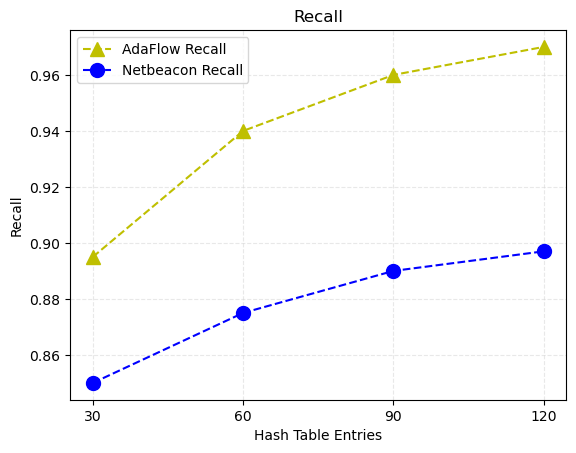

In [7]:
import matplotlib.pyplot as plt

# Define the recall values for different hash table sizes
hash_entries = [30, 60, 90, 120]
recall_values = [0.895, 0.94, 0.96, 0.97]

# Define the recall values for the Netbeacon system
netbeacon_recall_values = [0.85, 0.875, 0.89, 0.897]

# Plot the graph
plt.plot(hash_entries, recall_values, 'y^--', markersize=10, label='AdaFlow Recall')
plt.plot(hash_entries, netbeacon_recall_values, 'bo--', markersize=10, label='Netbeacon Recall')
#plt.xscale('log', base=2)  # Set log scale for x-axis
plt.xticks([30, 60, 90, 120])
plt.grid(True, linestyle='--', color='lightgray', alpha=0.5)

plt.xlabel('Hash Table Entries')
plt.ylabel('Recall')
plt.legend()
plt.title('AdaFlow vs NetBeacon')
plt.show()
